In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

In [ ]:
! pip install elevation

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import pandas as pd

In [ ]:
dem_path = '/content/drive/My Drive/Image Segmentation/'
file_path = dem_path + "Firsoff_HiRISE_5_low_res.tif-adj.tif"
gdal_data = gdal.Open(file_path)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array=[]
data_array = gdal_data.ReadAsArray().astype(np.float)
# data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
data_array.shape

(632, 358)

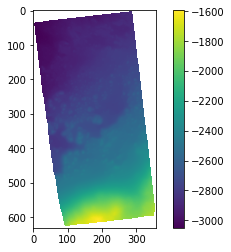

In [ ]:
plt.figure()
plt.imshow(data_array)
plt.colorbar()
plt.show()

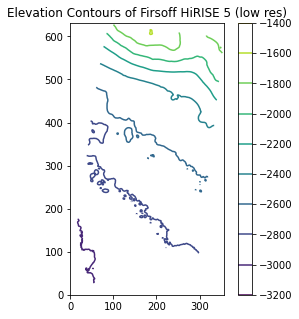

In [ ]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array)
plt.title("Elevation Contours of Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

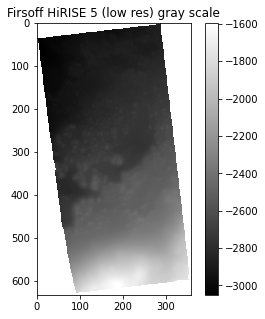

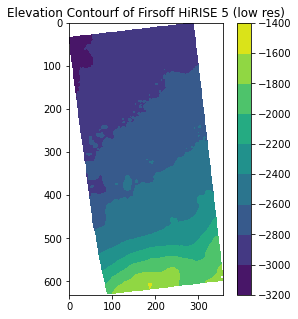

In [ ]:
#Plot image in grayscale
plt.figure(figsize=(5,5))
plt.imshow(data_array, cmap = 'gray')
plt.colorbar()
plt.title("Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of Firsoff HiRISE 5 (low res)")
plt.contourf(data_array)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import os
import subprocess
from osgeo import gdal
import matplotlib.pyplot as plt

In [ ]:
dem = gdal.Open(file_path)
slp = gdal.DEMProcessing(dem_path + "slope.tif", dem, "slope", computeEdges=True) 

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7ff4d40b0c00> >

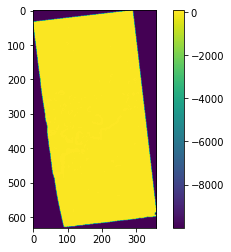

In [ ]:
slparray = slp.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(slparray)
plt.colorbar()
plt.show()

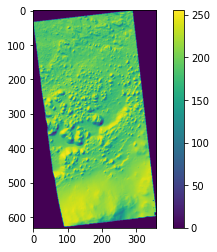

In [ ]:
# Creating a Hillshade
hillshade = gdal.DEMProcessing(dem_path + "hillshade1.tif", dem, "hillshade")
hillshade_array = hillshade.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(hillshade_array)
plt.colorbar()
plt.show()


In [ ]:
!pip install richdem

     |████████████████████████████████| 4.5 MB 36.9 MB/s 


In [ ]:
import richdem as rd

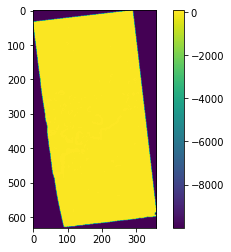

In [ ]:
rd_dem = rd.LoadGDAL(file_path)
rd_slope = rd.TerrainAttribute(rd_dem, attrib="slope_degrees")
plt.figure()
plt.imshow(rd_slope)
plt.colorbar()
plt.show()

# To save the result
# rd.SaveGDAL("rd_slope.tif", rd_slope)

In [ ]:
dataset = gdal.Open(file_path)

In [ ]:
# Getting som info about our DEM
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 358 x 632 x 1
Projection is PROJCS["unnamed",GEOGCS["Geographic Coordinate System",DATUM["D_MARS",SPHEROID["MARS",3396190,0]],PRIMEM["Reference Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Equirectangular"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",0],PARAMETER["standard_parallel_1",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
Origin = (-534141.0, 135873.0)
Pixel Size = (18.0, -18.0)


In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.5 MB/s 


In [ ]:
import rasterio

In [ ]:
src = rasterio.open(file_path)

In [ ]:
src.colorinterp[0]

<ColorInterp.gray: 1>

In [ ]:
profile = src.profile
profile['photometric'] = "RGB"
with rasterio.open(dem_path+"rgb.tif", 'w', **profile) as dst:
  dst.write(src.read())

from rasterio.enums import ColorInterp
with rasterio.open(dem_path+"rgb.tif", 'r+', **profile) as src1:
  src1.colorinterp = [ColorInterp.red, ColorInterp.green, ColorInterp.blue]

ValueError: ignored

In [ ]:
with rasterio.open(dem_path+"rgb.tif") as src2:
  src2.colorinterp[0]